# Assigment II

- Nama: Ines Savitri
- Kode Peserta: PYTN-KS07-017

## Statistical Treatment for Retail Datasets

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
# Mendownload datasets
df_NYC = pd.read_csv('nyc-rolling-sales.csv')

df_NYC.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Mengetahui jumlah data dan kolom
df_NYC.shape

(84548, 22)

In [4]:
# Cleansing data dengan standar missing value
df_NYC.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Unnamed: 0  BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY  \
0           False    False         False                    False   
1           False    False         False                    False   
2           False    False         False                    False   
3           False    False         False                    False   
4           False    False         False                    False   
...           ...      ...           ...                      ...   
84543       False    False         False                    False   
84544       False    False         False                    False   
84545       False    False         False                    False   
84546       False    False         False                    False   
84547       False    False         False                    False   

       TAX CLASS AT PRESENT  BLOCK    LOT  EASE-MENT  \
0                     False  False  False      False 

In [5]:
df_NYC.isnull().values.any()

False

##### Berdasarkan keterangan di atas, data yang akan dipakai sudah bersih, tidak ada data yang hilang atau rusak, sehingga data dapat diolah.

In [6]:
# Melihat informasi tipa data setiap kolom
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

##### Berdasarkan keterangan di atas, dapat diketahui bahwa dara berjumlah 22 kolom dan 84548 baris, dengan tipe data int64 (10) dan object(12) 

### Dataset ini berisi tentang catatan penjualan properti di New York selama periode 12 bulan, terkait harga properti tersebut terjual, berisi lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:
- Borough: Kode digit untuk borough tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5)
- Block; Lot: Kombinasi borough, block, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
- Kelas Bangunan saat ini dan Kelas Bangunan saat dijual: Jenis bangunan pada berbagai titik waktu

#### Dari kumpulan data di atas akan dianalisis menggunakan statistika deskriptif dan inferensial yang berguna untuk mendapatkan informasi tentang penjualan properti di New York.

In [7]:
# Melihat 5 data teratas dan menampilkan semua kolom
df_NYC.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# Melihat 5 data terbawah
df_NYC.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [9]:
# untuk mendapatkan list header kolom
df_NYC.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

## Processing Data and Cleaning Data

In [10]:
df_NYC.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'APARTMENT NUMBER', 'ADDRESS', 'ZIP CODE'], axis=1, inplace=True)

In [11]:
# Membuat kolom baru yang berisi tanggal bulan, dan tahun

df_NYC['SALE DATE'] = pd.to_datetime(df_NYC['SALE DATE'])
df_NYC['SALE MONTH'] = df_NYC['SALE DATE'].dt.month_name
df_NYC['SALE YEAR'] = df_NYC['SALE DATE'].dt.year

In [12]:
# Mengubah tipe data kolom menjadi numeric
df_NYC['LAND SQUARE FEET'] = pd.to_numeric(df_NYC['LAND SQUARE FEET'], errors = 'coerce')
df_NYC['GROP SQUARE FEET'] = pd.to_numeric(df_NYC['GROSS SQUARE FEET'], errors = 'coerce')
df_NYC['SALE PRICE'] = pd.to_numeric(df_NYC['SALE PRICE'], errors = 'coerce')

In [13]:
# Cek Missing Value dan drop Missing Value pada Dataset NYC

df_NaN = round((df_NYC.isnull().sum())/len(df_NYC)*100, 2)
df_NaN = pd.DataFrame(df_NaN)
df_NaN = df_NaN.rename(columns={0:'missing_value_percentage'})
df_NaN

,missing_value_percentage
BOROUGH,0.00
NEIGHBORHOOD,0.00
BUILDING CLASS CATEGORY,0.00
TAX CLASS AT PRESENT,0.00
BUILDING CLASS AT PRESENT,0.00
RESIDENTIAL UNITS,0.00
COMMERCIAL UNITS,0.00
TOTAL UNITS,0.00
LAND SQUARE FEET,31.05
GROSS SQUARE FEET,0.00


In [14]:
df_NYC = df_NYC.dropna()

In [15]:
# Memeriksa apakah masih terdapat Missing Value pada Dataset
df_NYC.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        BOROUGH  NEIGHBORHOOD  BUILDING CLASS CATEGORY  TAX CLASS AT PRESENT  \
0        False         False                    False                 False   
3        False         False                    False                 False   
4        False         False                    False                 False   
6        False         False                    False                 False   
9        False         False                    False                 False   
...        ...           ...                      ...                   ...   
84543    False         False                    False                 False   
84544    False         False                    False                 False   
84545    False         False                    False                 False   
84546    False         False                    False                 False   
84547    False         False                    False                

##### Berdasarkan output di atas maka dapat diketahui tidak ada nilai missing value pada dataset

In [16]:
# Memeriksa apakah ada duplicate pada dataset
df_NYC.duplicated().sum()

959

##### Berdasarkan outpput di atas dapat diketahui terdapat 959 baris duplikasi, jadi baris tersebut akan dihapus dari dataset

In [17]:
df_NYC = df_NYC.drop_duplicates(df_NYC.columns, keep='last')

In [18]:
df_NYC.duplicated().sum()

0

##### Berdasarkan output di atas maka dapat diketahui baris yang duplikasi sudah terhapus menjadi 0 baris.

In [19]:
# Mapping pada kolom BOROUGH, karena masih berupa kategori angka, maka akan diubah masing-masing angka berdasarkan nama borough pada angka tersebut.

df_NYC['BOROUGH'] = df_NYC['BOROUGH'].map({1: 'Manhattan', 2:'Bronx', 3: 'Brooklyn', 4:'Queens',5:'Staten Island'})
df_NYC.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,GROP SQUARE FEET
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,6440,1900,2,C2,6625000.0,2017-07-19,<bound method PandasDelegate._add_delegate_acc...,2017,6440.0
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794,1913,2,C4,3936272.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016,6794.0
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615,1900,2,C2,8000000.0,2016-11-17,<bound method PandasDelegate._add_delegate_acc...,2016,4615.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226,1920,2,C4,3192840.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016,4226.0
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,18523,1920,2,D9,16232000.0,2016-11-07,<bound method PandasDelegate._add_delegate_acc...,2016,18523.0


In [20]:
# Membuat tabel informasi statistik
df_NYC.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE YEAR,GROP SQUARE FEET
count,47285.000000,47285.000000,47285.000000,4.728500e+04,47285.000000,47285.000000,4.728500e+04,47285.000000,4.728500e+04
mean,2.514053,0.239717,2.770561,3.291470e+03,1833.514561,1.460167,1.171341e+06,2016.647393,3.530269e+03
std,16.532690,10.915300,19.935527,3.071844e+04,452.767948,0.817759,1.352859e+07,0.477787,2.916192e+04
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,2016.000000,0.000000e+00
25%,1.000000,0.000000,1.000000,1.463000e+03,1920.000000,1.000000,1.247340e+05,2016.000000,8.840000e+02
50%,1.000000,0.000000,1.000000,2.150000e+03,1931.000000,1.000000,4.900000e+05,2017.000000,1.628000e+03
75%,2.000000,0.000000,2.000000,3.088000e+03,1960.000000,2.000000,8.400000e+05,2017.000000,2.520000e+03
max,1844.000000,2261.000000,2261.000000,4.228300e+06,2017.000000,4.000000,2.210000e+09,2017.000000,3.750565e+06


##### Berdasarkan output di atas maka dapat diketahui jumlah, rata-rata, standar deviasi, nilai minimum, kuartil 1-3, dan nilai maximum per kolom dataset yang digunakan

In [21]:
df_NYC.shape

(47285, 18)

### Data yang akan diolah

In [41]:
# Mengubah tipe data menjadi numeric yang ingin dijadikan hipotesis
df_NYC['GROSS SQUARE FEET'] = pd.to_numeric(df_NYC['GROSS SQUARE FEET'], errors = 'coerce')
df_NYC['SALE PRICE'] = pd.to_numeric(df_NYC['SALE PRICE'], errors = 'coerce')

In [42]:
# Mengurutkan indeks sesuai dengan nomor baris
df_NYC.reset_index(inplace = True)
df_NYC.head()

,level_0,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE YEAR,GROP SQUARE FEET
0,1,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,6794,1913,2,C4,3936272.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016,6794.0
1,3,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226,1920,2,C4,3192840.0,2016-09-23,<bound method PandasDelegate._add_delegate_acc...,2016,4226.0
2,7,172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,3,1,4,1520.0,3360,1910,2,S3,3300000.0,2016-11-15,<bound method PandasDelegate._add_delegate_acc...,2016,3360.0
3,9,174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S5,5,1,6,1779.0,3713,1910,2,S5,4750000.0,2017-04-03,<bound method PandasDelegate._add_delegate_acc...,2017,3713.0
4,10,195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,0,1,1,1218.0,3586,1899,4,K4,3700000.0,2016-09-28,<bound method PandasDelegate._add_delegate_acc...,2016,3586.0


In [43]:
df_NYC.shape

(27056, 20)

In [44]:
df_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27056 entries, 0 to 27055
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   level_0                         27056 non-null  int64         
 1   index                           27056 non-null  int64         
 2   BOROUGH                         27056 non-null  object        
 3   NEIGHBORHOOD                    27056 non-null  object        
 4   BUILDING CLASS CATEGORY         27056 non-null  object        
 5   TAX CLASS AT PRESENT            27056 non-null  object        
 6   BUILDING CLASS AT PRESENT       27056 non-null  object        
 7   RESIDENTIAL UNITS               27056 non-null  int64         
 8   COMMERCIAL UNITS                27056 non-null  int64         
 9   TOTAL UNITS                     27056 non-null  int64         
 10  LAND SQUARE FEET                27056 non-null  float64       
 11  GR

## Analisis Data dengan Statistik Deskriptif dan Inferensia


Menggunakan analisis statistik deskriptif dan inferensia dapat menjawab pertanyaan/asumsi hipotesis yang akan di uji.

In [45]:
# Download Package
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import math
import scipy.stats
from scipy.stats import t
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import datetime

## Distribusi Statistik Harga Penjualan Unit Properti di NYC

#### Untuk pengolaha data kita memakai kolom "SALE PRICE"

Dari data yang diperoleh dapat diketahui nilai maksimum pada kolom "SALE PRICE" sebesar 2.210.000.000, maka akan dilihat distribusi frekuensi dari kolom tersebut di mana nilai harga penjualan di atas 10.000.000 tidak disertakan, karena nilai kuartil ke-3 sebesar 8.400.000.

Untuk mendapatkan nilai harga penjualan yang signifikan, berdasarkan nilai kuartil-1 sebesar 100.000, dan harga penjualan di bawah 5.000.000, maka tidak diikutsertakan dalam analisis. Karena dibawah kuartil-1 dan di atas kuartil-3 akan dijadikan outlier/batas.

Text(0.5, 1.0, 'Distribusi SALE PRICE')

<Figure size 720x360 with 0 Axes>

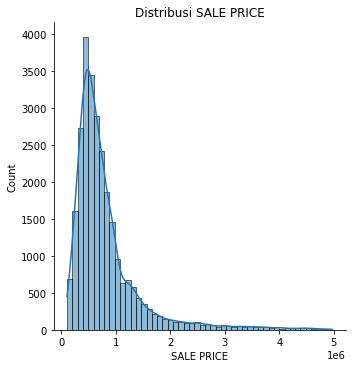

In [46]:
# Distribusi Penjualan Unit Properti di NYC
df_NYC = df_NYC[(df_NYC['SALE PRICE']>100000) & (df_NYC['SALE PRICE']<5000000)]
plt.figure(figsize=(10,5))
sns.displot(df_NYC['SALE PRICE'], kde=True, bins=50)
plt.title('Distribusi SALE PRICE')

In [47]:
df_NYC['SALE PRICE'].describe()

count    2.705600e+04
mean     8.077497e+05
std      6.491966e+05
min      1.007000e+05
25%      4.400000e+05
50%      6.250000e+05
75%      9.250000e+05
max      4.975000e+06
Name: SALE PRICE, dtype: float64

##### Berdasarkan output dari analisis yang telah di olah data, dapat diketahui perbedaan nilai yang lebih signifikan. Nilai minimum sebesar 100.000 USD dan max mendekati 5.000.000 USD, ini telah sesuai dengan distribusi yang diinginkan.

In [70]:
# Nilai rata-rata harga penjualan
df_NYC['SALE PRICE'].mean()

807749.744234181

In [48]:
# Nilai median harga penjualan per unit
df_NYC['SALE PRICE'].median()

625000.0

In [49]:
# Niai modus harga penjualan per unit
df_NYC['SALE PRICE'].mode()

0    700000.0
Name: SALE PRICE, dtype: float64

In [50]:
# Ukuran Persebaran Data
print('Range: ', np.ptp(df_NYC['SALE PRICE']))
print('Variance: ', np.var(df_NYC['SALE PRICE']))
print('Standar Deviation: ', np.std(df_NYC['SALE PRICE']))
print('Skewness: ', scipy.stats.skew(df_NYC['SALE PRICE']))

Range:  4874300.0
Variance:  421440658478.36804
Standar Deviation:  649184.6104756088
Skewness:  2.7893840670295487


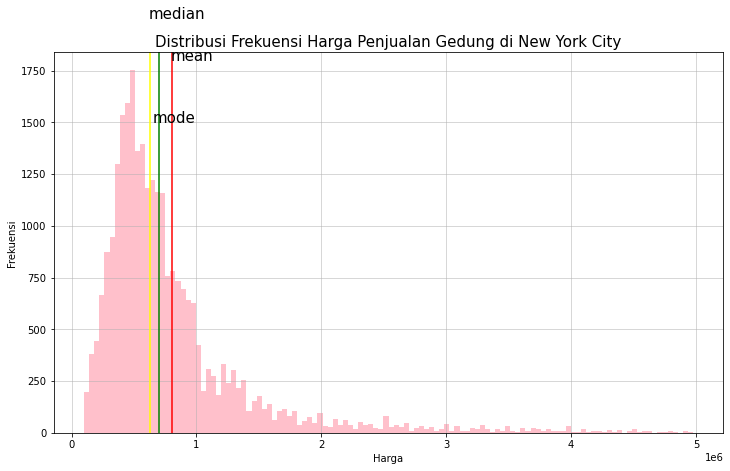

In [51]:
df_NYC['SALE PRICE'].plot(kind='hist', figsize=(12, 7), bins=120, color='pink')
plt.title("Distribusi Frekuensi Harga Penjualan Gedung di New York City", fontsize=15)
plt.xlabel('Harga', fontsize=10)
plt.ylabel('Frekuensi', fontsize=10)
plt.axvline(df_NYC['SALE PRICE'].mean(), c='red')
plt.axvline(df_NYC['SALE PRICE'].median(), c='yellow')
plt.axvline(df_NYC['SALE PRICE'].mode()[0], c='green')
plt.text(625000, 2000, 'median', fontsize=15)
plt.text(80000, 1800, 'mean', fontsize=15)
plt.text(700000, 1500, 'mode', fontsize=15)
plt.grid(linewidth=0.5)

##### Berdasarkan plot diatas, dapat diketahui distribusi statistik harga penjualan properti di New York dimana frekuensi tertinggi harga prorerty dibawah 1.000.000 USD. Rata-rata harga penjualan property kurang lebih sebesar 800.000 USD, median harga penjualan property sebesar 610.000 USD, dan property di New York City paling banyak terjual di harga 650.000 USD

### Confidence Interval rata-rata harga penjualan unit properti di NYC

In [52]:
x = df_NYC['SALE PRICE']

mean = x.mean()
std = x.std()
dof = len(x)-1  #degree of freedom, yaitu penentuan nilai statistik ujinya

confidance = 0.95 # tingkat kepercayaan
t_test = np.abs(t.ppf((1-confidance)/2, dof))

values = np.round((mean-std*t_test/np.sqrt(len(x)), mean+std*t_test/np.sqrt(len(x))),2)

print(values)

[800013.82 815485.66]


##### Berdasarkan output di atas dapat diketahui bahwa rata-rata harga penjualan properti di NYC sebesar 800.013 USD sampai dengan 815.485 USD dengan tingkat kepercayaan 0.95 atau 95%. 

## Hipotesis test

In [53]:
# Download Package
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import kstest, shapiro

Sebelumnya kita sudah mengolah data penjualan unit properti di New York City. Di asumsikan sebuah pertanyaan "Apakah Harga Penjualan dipengaruhi luas wilayahnya atau tidak?".
Asumsi hipotesis di atas akan diuji dengan menggunakan Uji Normalitas terlebih dahulu.

Misalkan ditentukan level signifikansi 5% atau 0.05.
Hipotesisnya adalah:
- H0 : data tidak sesuai dengan distribusi normal
- H1 : data sesuai dengan distribusi normal

In [61]:
ksdata = kstest(df_NYC['SALE PRICE'], 'norm')
swdata = shapiro(df_NYC['SALE PRICE'])
print(ksdata)
print(swdata)

KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.7175456285476685, pvalue=0.0)


In [55]:
ksdata = kstest(df_NYC['GROSS SQUARE FEET'], 'norm')
swdata = shapiro(df_NYC['GROSS SQUARE FEET'])
print(ksdata)
print(swdata)

KstestResult(statistic=0.9864725014784151, pvalue=0.0)
ShapiroResult(statistic=0.014278411865234375, pvalue=0.0)


### Pearson's Correaltion Coefficient

Menguji apakah sample SALE PRICE dan GROSS SQUARE FEET saling berkorelasi

Interpretasi
- H0: the two samples are independent
- H1: there is a depedency between the samples

In [64]:
from scipy.stats import pearsonr
data1 = df_NYC['SALE PRICE']
data2 = df_NYC['GROSS SQUARE FEET']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.045, p=0.000
Probably dependent


##### Berdasarkan output yang didapatkan maka dapat disimpulkan H0 ditolak, dan H1 diterima. Hasil dari perhitungan sebesar 0.045 yang berarti kurang dari 0.05 ini menandakan bahwa data berdistribusi tidak normal, dan memiliki tipe korelasi positif. 

Text(0.5, 1.0, 'Hubungan antara GROSS SQUARE FEET dan SALE PRICE')

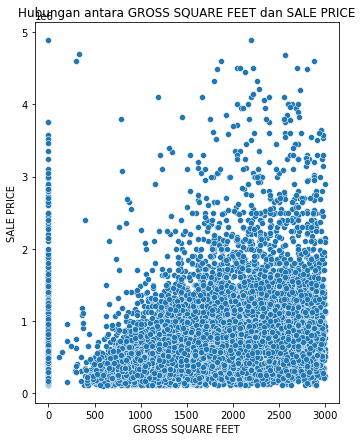

In [69]:
df_gp = df_NYC[['GROSS SQUARE FEET', 'SALE PRICE']]

#Karena ukuran gross square feet lebih besar dari 3000 maka akan dianggap outlier
df_gross_price = df_gp[df_gp['GROSS SQUARE FEET'] < 3000]
# visualisasi menggunakan scatterplot
fig = plt.figure(figsize=(12, 7))

ax0 = fig.add_subplot(1,2,1)
sns.scatterplot(data= df_gross_price, x='GROSS SQUARE FEET', y='SALE PRICE', ax=ax0)
ax0.set_title('Hubungan antara GROSS SQUARE FEET dan SALE PRICE')

##### Berdasarkan scatterplot di atas, diketahui bahwa ukuran luas lahan properti seluruhnya mempunyai pengaruh yang positif, karena semakin besar ukuran luas lahan properti seluruhnya akan diikuti dengan kenaikan harga jual properti tersebut.

## Kesimpulan
Berdasarkan analisis statistik deskriptif dan inferensia, didapatkan kesimpulan sebagai berikut:

- Rata-Rata harga penjualan properti di NYC sebesar 800.013 USD sampai dengan 815.485 USD dengan tingkat kepercayaan 0.95 atau 95%.
- Harga penjualan properti di NYC juga memiliki nilai varians dan standar deviasi yang sangat besar, ini berarti harga penjualan properti di NYC sangat bervariasi.
- Ukuran luas lahan unit properti (GROSS SQUARE FEET) mempengaruhi harga penjualan properti di New York City, yaitu semakin besar luas lahan properti, harga jual semakin tinggi juga.
